In [1]:
#Import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Data
data = pd.read_csv('torvik_2025-02-19_09-49-59.csv')

In [13]:
z_scores_list = ['EFG Z','EFGD Z','TOR Z','TORD Z','ORB Z','DRB Z','FTR Z','FTRD Z','2P Z','2PD Z','3P Z','3PD Z','3PR Z','3PRD Z','Adj T Z','Tournament Games Won']

In [14]:
#Get correlations of z-scores with tournament seed
data[z_scores_list].corr()['Tournament Games Won'].sort_values(ascending=False)

Tournament Games Won    1.000000
EFG Z                   0.239344
2P Z                    0.219678
ORB Z                   0.188133
3P Z                    0.175790
TORD Z                  0.059613
FTR Z                   0.019735
3PR Z                  -0.004503
Adj T Z                -0.007394
3PRD Z                 -0.035102
DRB Z                  -0.085500
FTRD Z                 -0.108909
TOR Z                  -0.179791
3PD Z                  -0.182835
2PD Z                  -0.227432
EFGD Z                 -0.252618
Name: Tournament Games Won, dtype: float64

In [4]:
cluster_features = ['EFG Z', '2P Z', 'ORB Z', '3P Z', 'EFGD Z', '2PD Z', '3PD Z', 'TOR Z']

In [5]:
tournament_teams = data[data['Tournament Seed'].isna() == False]
tournament_teams 

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,FTR Z,FTRD Z,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z
0,1,Gonzaga,WCC,33,32–1,119.8,88.0,0.9720,58.0,41.6,...,0.605372,-1.665005,2.759087,-2.825608,1.206615,-2.084406,-0.708359,-1.187008,0.782573,2.209987
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,-0.033384,-2.386422,3.152786,-0.137262,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,-2.147887,-0.290877,0.215184,-1.315301,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,1.376284,-0.170640,1.244859,-0.409117,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,-0.517958,-0.737468,0.548314,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,210,Montana St.,BSky,31,15–16,102.7,106.4,0.3996,53.9,52.3,...,-0.479760,0.704523,0.911795,1.311637,1.067070,-0.605489,0.785759,-0.486033,0.419357,-0.502825
2705,230,Stetson,ASun,31,19–12,108.4,114.1,0.3568,53.4,52.0,...,-0.269425,-1.310937,0.645872,0.645652,1.106717,0.325346,0.861763,0.027148,-0.647685,0.195371
2738,263,Howard,MEAC,32,16–16,104.8,113.0,0.2959,52.0,50.9,...,1.939085,1.085827,-0.329180,0.154925,1.503185,0.080389,0.310734,-1.050531,0.091036,-0.561009
2757,282,Grambling St.,SWAC,31,17–14,97.4,106.3,0.2678,48.2,49.1,...,1.392216,0.141647,-0.979215,-0.686320,0.155192,-0.066585,-1.418355,-0.999213,-1.058086,0.035368


K-Means

c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

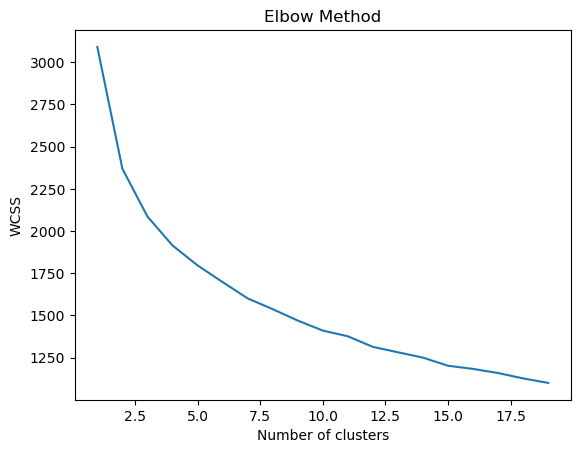

In [6]:
#Create elbow graph for k-means clustering these teams on z-scores
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Create elbow graph to determine optimal number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tournament_teams[cluster_features])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
#Create k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=16, init='k-means++', max_iter=300, n_init=10, random_state=0)
tournament_teams['kcluster'] = kmeans.fit_predict(tournament_teams[cluster_features])
tournament_teams.head()

c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\manas\AppData\Local\Temp\ipykernel_3628\3759242722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tournament_teams['kcluster'] = kmeans.fit_predict(tournament_teams[cluster_features])


,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,kcluster,hcluster
0,1,Gonzaga,WCC,33,32–1,119.8,88.0,0.9720,58.0,41.6,...,2.759087,-2.825608,1.206615,-2.084406,-0.708359,-1.187008,0.782573,2.209987,6,9
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,3.152786,-0.137262,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732,6,6
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,0.215184,-1.315301,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085,3,7
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,1.244859,-0.409117,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517,5,7
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,0.548314,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,15,11


In [78]:
#Get average stats by cluster
cluster_stats = tournament_teams.groupby('kcluster')[cluster_features].mean()
cluster_stats

,EFG Z,2P Z,ORB Z,3P Z,EFGD Z,2PD Z,3PD Z,TOR Z
kcluster,,,,,,,,
0,1.141817,1.241385,-0.473092,0.554262,-0.813039,-0.911486,-0.295953,-0.657072
1,-0.819799,-0.702382,0.892183,-0.665708,-0.914324,-0.843741,-0.668477,-0.275685
2,2.014111,1.726120,-1.196068,1.619191,-0.034228,-0.040570,-0.034107,-1.408271
3,0.436320,0.219229,0.058461,0.603319,-1.324024,-1.048567,-1.223851,-1.040948
4,0.904827,0.287114,1.104166,1.437667,0.242255,0.536382,-0.282189,0.230685
5,1.278135,1.416604,1.064702,0.664497,-0.934077,-0.377461,-1.403286,-0.928682
6,2.634271,2.940178,0.207876,1.248993,-1.459593,-1.509534,-0.729078,-1.395402
7,1.131858,1.212185,0.069111,0.588493,0.621956,0.551674,0.487415,-1.180856
8,0.549351,0.518045,1.432389,0.421503,-2.592184,-2.285520,-1.976304,-1.041015


In [79]:
cluster_tournament = tournament_teams.groupby('kcluster')[['Tournament Games Won','Tournament Seed']].mean()
cluster_tournament.sort_values('Tournament Games Won', ascending=False)

,Tournament Games Won,Tournament Seed
kcluster,,
6,2.384615,4.000000
8,2.055556,3.555556
13,1.960000,4.480000
14,1.156250,7.687500
5,1.129032,7.612903
15,0.914894,8.680851
0,0.868421,9.973684
7,0.826087,10.695652
10,0.800000,9.342857


Hierachrical Clustering

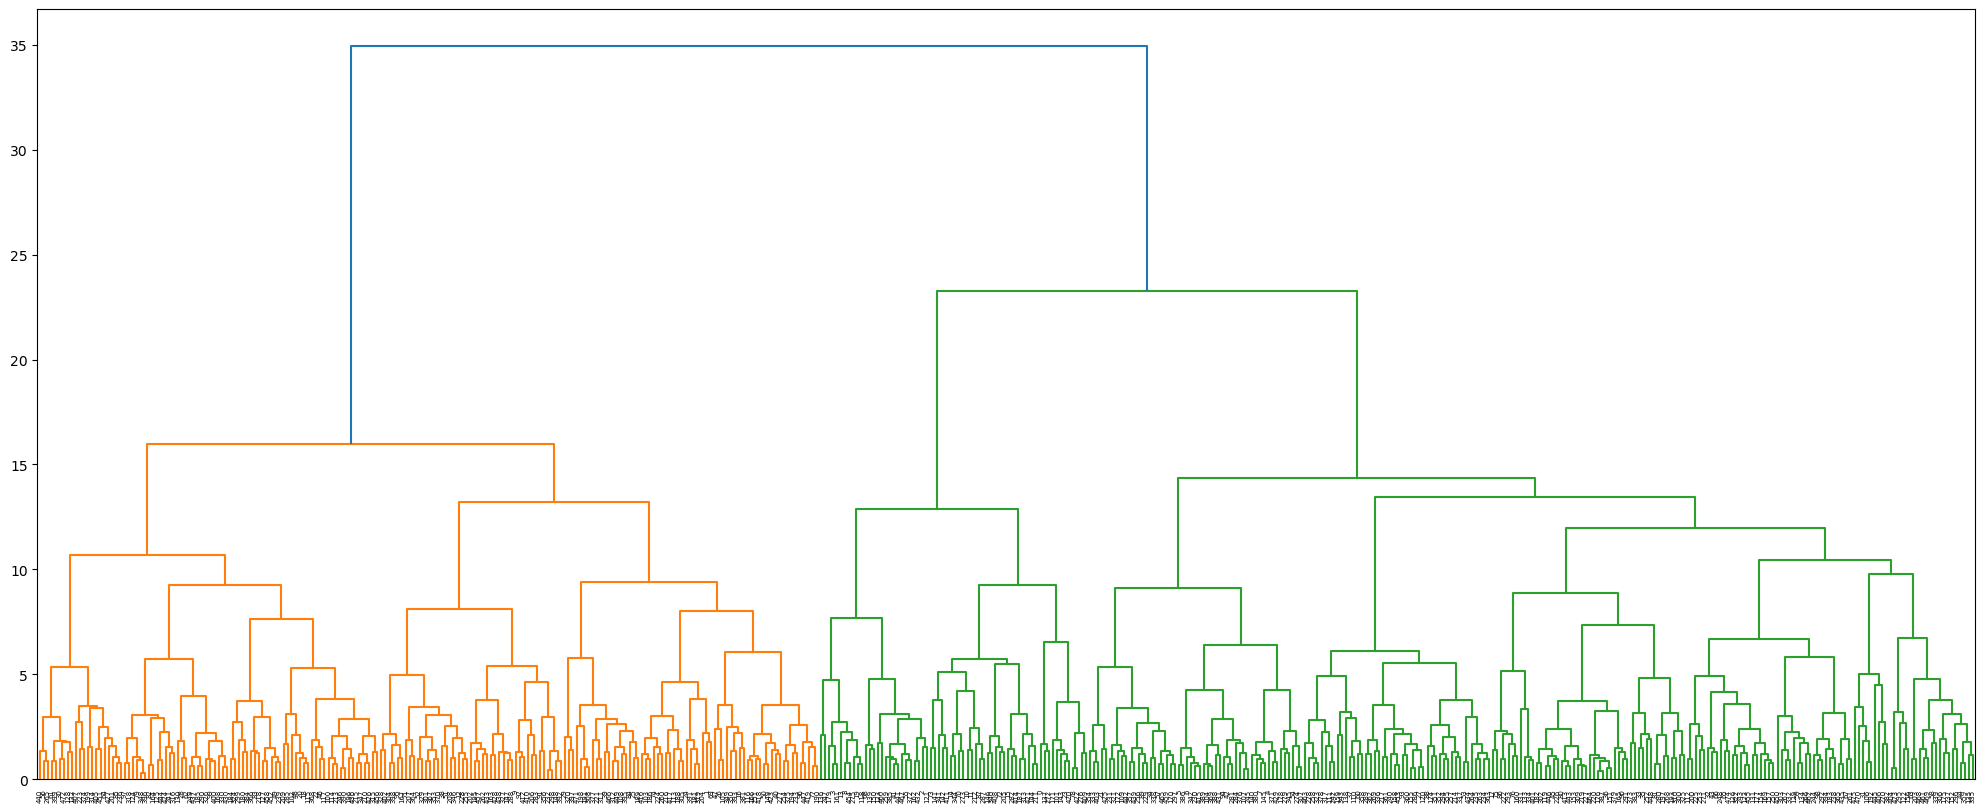

In [57]:
#Hierarchical Clustering of tournament teams
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib

#Create dendrogram
Z = linkage(tournament_teams[cluster_features], 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [59]:
from scipy.cluster.hierarchy import fcluster
# Determine the clusters by cutting the dendrogram at a specific distance
max_d = 9  # Example distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to your data
tournament_teams['hcluster'] = clusters

C:\Users\manas\AppData\Local\Temp\ipykernel_3628\453970859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tournament_teams['hcluster'] = clusters


In [60]:
tournament_teams['hcluster'].value_counts()

hcluster
13    48
12    46
4     45
6     44
14    41
3     37
11    31
7     27
8     27
2     26
10    22
1     21
16    21
5     19
9     12
15     9
Name: count, dtype: int64

In [61]:
#Get average seed and tournament wins by Cluster
cluster_tournament = tournament_teams.groupby('hcluster')[['Tournament Games Won','Tournament Seed']].mean()
cluster_tournament.sort_values('Tournament Games Won', ascending=False)

,Tournament Games Won,Tournament Seed
hcluster,,
9,2.583333,3.250000
8,2.000000,4.037037
6,1.409091,7.659091
4,1.288889,7.822222
11,1.129032,6.612903
7,1.037037,8.370370
12,0.869565,8.956522
2,0.846154,9.884615
15,0.777778,12.666667


In [ ]:
#Rename hclusters according to average tournament wins in tournament_teams
cluster_tournament['Tournament Games Won'].sort_values(ascending=False)



,Tournament Games Won,Tournament Seed,hcluster
hcluster,,,
5,0.105263,11.210526,1
16,0.238095,11.761905,2
14,0.439024,11.487805,3
10,0.545455,10.181818,4
1,0.571429,12.523810,5
13,0.645833,8.375000,6
3,0.648649,8.486486,7
15,0.777778,12.666667,8
2,0.846154,9.884615,9


In [72]:
#Look at cluster 8
tournament_teams[tournament_teams['hcluster'] == 5][['Team','Year','Tournament Seed','Tournament Games Won']]

,Team,Year,Tournament Seed,Tournament Games Won
25,Creighton,2017,6.0,0
29,Marquette,2017,10.0,0
44,Virginia Tech,2017,9.0,0
367,Creighton,2018,8.0,0
402,Davidson,2018,12.0,0
797,Northeastern,2019,13.0,0
809,Georgia St.,2019,14.0,0
883,Gardner Webb,2019,16.0,0
1425,Virginia,2021,4.0,0
1795,Notre Dame,2022,11.0,1


In [71]:
#Get z-score averages by cluster
cluster_stats = tournament_teams.groupby('hcluster')[z_scores_list].mean()
cluster_stats

,EFG Z,EFGD Z,TOR Z,TORD Z,ORB Z,DRB Z,FTR Z,FTRD Z,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,Tournament Games Won
hcluster,,,,,,,,,,,,,,,,
1,0.851026,0.593021,-1.137520,0.111248,-0.411766,-0.130316,-0.099775,-0.246220,0.595633,0.383651,0.845511,0.690701,0.436974,-0.002985,0.172864,0.571429
2,0.944646,-0.696871,-0.616130,0.071735,-0.344407,-0.457230,0.338972,-0.515843,1.135976,-0.955904,0.298404,0.041574,0.083947,-0.544632,-0.152789,0.846154
3,0.683807,-0.583540,-1.609308,0.094638,-0.052100,-0.367748,0.085393,-0.510074,0.250945,-0.579841,1.054052,-0.368185,0.073586,0.188233,-0.311093,0.648649
4,1.605680,-0.746004,-0.232553,-0.338083,0.513661,-0.687720,0.257479,-0.690330,1.011446,-0.815200,1.818663,-0.310680,0.112293,-0.199858,0.043273,1.288889
5,1.956983,0.016506,-1.308370,-0.535700,-1.385525,-0.921125,-0.466295,-1.000174,1.546530,0.067251,1.755539,-0.104021,0.717013,0.457348,-0.211526,0.105263
6,1.912771,-0.534422,-1.171285,0.078930,0.028699,-0.572929,-0.439028,-0.797265,2.002512,-0.430738,1.103391,-0.453566,0.466653,-0.211898,0.031914,1.409091
7,1.110088,-1.546285,-1.173710,-0.001018,-0.067056,-0.729599,-0.045609,-0.754189,0.944053,-1.033073,0.949250,-1.739494,0.168229,-0.224875,-0.378061,1.037037
8,0.877149,-2.270088,-0.536261,0.205621,1.780198,-0.371314,0.175253,-0.017155,0.722302,-2.298131,0.790419,-1.271019,-0.036246,-0.147819,-0.403450,2.000000
9,1.921870,-1.727585,-1.096472,-0.361963,1.049546,-0.703368,0.346569,-0.800383,2.197809,-2.077503,0.779977,-0.430175,-0.380939,-0.619661,0.788685,2.583333


In [74]:
import numpy as np
# Calculate the centroids of the original clusters
centroids = []
for cluster in set(clusters):
    cluster_points = tournament_teams[tournament_teams['hcluster'] == cluster][z_scores_list]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

In [80]:
tournament_teams

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,kcluster,hcluster
0,1,Gonzaga,WCC,33,32–1,119.8,88.0,0.9720,58.0,41.6,...,2.759087,-2.825608,1.206615,-2.084406,-0.708359,-1.187008,0.782573,2.209987,6,9
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,3.152786,-0.137262,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732,6,6
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,0.215184,-1.315301,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085,3,7
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,1.244859,-0.409117,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517,5,7
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,0.548314,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,210,Montana St.,BSky,31,15–16,102.7,106.4,0.3996,53.9,52.3,...,0.911795,1.311637,1.067070,-0.605489,0.785759,-0.486033,0.419357,-0.502825,2,5
2705,230,Stetson,ASun,31,19–12,108.4,114.1,0.3568,53.4,52.0,...,0.645872,0.645652,1.106717,0.325346,0.861763,0.027148,-0.647685,0.195371,7,1
2738,263,Howard,MEAC,32,16–16,104.8,113.0,0.2959,52.0,50.9,...,-0.329180,0.154925,1.503185,0.080389,0.310734,-1.050531,0.091036,-0.561009,4,16
2757,282,Grambling St.,SWAC,31,17–14,97.4,106.3,0.2678,48.2,49.1,...,-0.979215,-0.686320,0.155192,-0.066585,-1.418355,-0.999213,-1.058086,0.035368,1,14


In [82]:
model_df = tournament_teams[['Team','Year','Tournament Seed','Tournament Games Won','kcluster','Barthag']]

model_df = pd.get_dummies(model_df, columns=['kcluster'], drop_first=True, dtype=int)
model_df

,Team,Year,Tournament Seed,Tournament Games Won,Barthag,kcluster_1,kcluster_2,kcluster_3,kcluster_4,kcluster_5,kcluster_6,kcluster_7,kcluster_8,kcluster_9,kcluster_10,kcluster_11,kcluster_12,kcluster_13,kcluster_14,kcluster_15
0,Gonzaga,2017,1.0,5,0.9720,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Villanova,2017,1.0,1,0.9622,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Virginia,2017,5.0,1,0.9591,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Kentucky,2017,2.0,3,0.9545,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,North Carolina,2017,1.0,6,0.9531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,Montana St.,2024,16.0,0,0.3996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2705,Stetson,2024,16.0,0,0.3568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2738,Howard,2024,16.0,0,0.2959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2757,Grambling St.,2024,16.0,0,0.2678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
#Create a linear regression to predict tournament games won
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = model_df[['Barthag','kcluster_1','kcluster_2','kcluster_3','kcluster_4','kcluster_5','kcluster_6','kcluster_7','kcluster_8','kcluster_9','kcluster_10','kcluster_11','kcluster_12','kcluster_13','kcluster_14','kcluster_15']]
y = model_df['Tournament Games Won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Tournament Games Won   R-squared:                       0.255
Model:                              OLS   Adj. R-squared:                  0.222
Method:                   Least Squares   F-statistic:                     7.762
Date:                  Wed, 19 Feb 2025   Prob (F-statistic):           7.51e-16
Time:                          13:19:20   Log-Likelihood:                -587.77
No. Observations:                   380   AIC:                             1210.
Df Residuals:                       363   BIC:                             1277.
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6520      0.373     -4.428      0.000      -2.386      -0.918
Barthag         3.0875      0.395      7.811      0.000       2.310       3.865
kcluster_1      0.0494      0.306      0.161      0.872      -0.552       0.651
kcluster_2     -0.4714      0.339     -1.391      0.165      -1.138       0.195
kcluster_3     -0.1880      0.288     -0.654      0.514      -0.753       0.377
kcluster_4      0.1409      0.402      0.351      0.726      -0.649       0.931
kcluster_5      0.1832      0.310      0.591      0.555      -0.426       0.793
kcluster_6      1.4310      0.430      3.327      0.001       0.585       2.277
kcluster_7      0.1688      0.350      0.483      0.629      -0.519       0.856
kcluster_8      0.8343      0.405      2.062      0.040       0.038       1.630
kcluster_9      0.0285      0.336      0.085      0.932      -0.632       0.689
kcluster_10    -0.0435      0.311     -0.140      0.889      -0.655       0.568
kcluster_11     0.2234      0.338      0.661      0.509      -0.441       0.888
kcluster_12     0.0073      0.288      0.025      0.980      -0.560       0.574
kcluster_13     0.6379      0.353      1.807      0.072      -0.056       1.332
kcluster_14     0.3186      0.325      0.979      0.328      -0.321       0.959
kcluster_15     0.1081      0.288      0.375      0.708      -0.459       0.675
==============================================================================
Omnibus:                      106.052   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.309
Skew:                           1.420   Prob(JB):                     2.94e-52
Kurtosis:                       5.630   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
y_pred = model.predict(sm.add_constant(X_test))
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.4398959150155743

In [115]:
#Add random forest predictions to X_test
X_test['Linear Predictions'] = y_pred
X_test['Actual'] = y_test

#Add team name and year to X_test
X_test['Team'] = tournament_teams['Team']
X_test['Year'] = tournament_teams['Year']

print(X_test.sort_values('Linear Predictions', ascending=False))

      Barthag  kcluster_1  kcluster_2  kcluster_3  kcluster_4  kcluster_5  \
1755   0.9731           0           0           0           0           0   
1      0.9622           0           0           0           0           0   
361    0.9239           0           0           0           0           0   
708    0.9527           0           0           0           0           0   
6      0.9515           0           0           0           0           0   
...       ...         ...         ...         ...         ...         ...   
883    0.4530           0           1           0           0           0   
614    0.2841           0           0           0           0           0   
2379   0.2865           0           0           0           0           0   
2685   0.3996           0           1           0           0           0   
669    0.1707           0           0           0           0           0   

      kcluster_6  kcluster_7  kcluster_8  kcluster_9  kcluster_10  \
1755  

In [116]:
from scipy.spatial.distance import cdist
def assign_clusters(new_data, centroids):
    distances = cdist(new_data, centroids, 'euclidean')
    cluster_labels = np.argmin(distances, axis=1) + 1  # Cluster labels start from 1
    return cluster_labels

In [117]:
#Get 2025 teams from clean_df
teams_2025 = data[data['Year'] == 2025]

teams_2025['kcluster'] = kmeans.predict(teams_2025[cluster_features])

teams_2025

C:\Users\manas\AppData\Local\Temp\ipykernel_3628\1610754493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_2025['kcluster'] = kmeans.predict(teams_2025[cluster_features])


,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,OE Z,DE Z,dcluster,kcluster
2838,1,Houston,B12,26,22–4,125.1,88.2,0.9824,52.8,45.3,...,2.188608,-0.893481,-0.844649,1.195349,-2.518088,2.285278,2.543670,-2.718875,-1,13
2839,2,Auburn (H) 46 Arkansas,SEC,25,23–2,131.1,93.4,0.9803,56.2,45.0,...,1.385954,-1.719261,0.353600,-1.178007,0.426569,2.949355,3.351102,-1.933434,-1,13
2840,3,Duke,ACC,26,23–3,125.6,90.6,0.9771,57.3,44.4,...,1.615284,-0.763094,1.275331,-0.321641,-0.727419,2.183113,2.610956,-2.356364,-1,13
2841,4,Florida,SEC,26,23–3,124.2,93.5,0.9631,54.7,44.2,...,0.583300,-2.327730,0.814465,-0.492914,0.784703,2.285278,2.422555,-1.918330,-1,8
2842,5,Tennessee,SEC,26,21–5,116.0,88.1,0.9597,52.8,43.5,...,0.162862,-2.414654,0.703858,1.635766,-1.324309,2.200140,1.319064,-2.733980,-1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,95,UNLV,MWC,26,14–12,108.4,101.1,0.6908,50.3,49.8,...,0.124640,-0.328473,-0.863084,1.048544,-0.727419,0.412241,0.296317,-0.770378,-1,10
2933,96,Akron,MAC,24,19–5,111.8,104.3,0.6884,55.0,48.7,...,1.080181,-0.980405,1.385938,-0.101433,1.819312,0.889014,0.753862,-0.287030,6,5
2934,97,Georgetown (H) 91 Providence,BE,25,15–10,104.2,97.4,0.6834,50.2,47.3,...,-1.404225,0.062686,-0.641869,-0.272706,0.267398,0.684683,-0.268885,-1.329249,-1,11
2935,98,South Dakota St. (H) 114 North Dakota St.,Sum,24,15–9,111.5,104.5,0.6791,55.2,50.2,...,0.850851,-0.850018,0.224558,2.027247,0.784703,0.514407,0.713490,-0.256820,6,4


In [118]:
teams_2025 = pd.get_dummies(teams_2025, columns=['kcluster'],drop_first=True,dtype= int)

In [119]:
teams_2025['kcluster_6'] = 0

In [120]:
teams_2025.columns

Index(['Rk', 'Team', 'Conf', 'G', 'Rec', 'AdjOE', 'AdjDE', 'Barthag', 'EFG%',
       'EFGD%', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P%', '2P%D',
       '3P%', '3P%D', '3PR', '3PRD', 'Adj T.', 'WAB', 'Year', 'Conf Record',
       'Tournament Result', 'Tournament Seed', 'Tournament Games Won', 'EFG Z',
       'EFGD Z', 'TOR Z', 'TORD Z', 'ORB Z', 'DRB Z', 'FTR Z', 'FTRD Z',
       '2P Z', '2PD Z', '3P Z', '3PD Z', '3PR Z', '3PRD Z', 'Adj T Z', 'WAB Z',
       'OE Z', 'DE Z', 'dcluster', 'kcluster_1', 'kcluster_2', 'kcluster_3',
       'kcluster_4', 'kcluster_5', 'kcluster_7', 'kcluster_8', 'kcluster_9',
       'kcluster_10', 'kcluster_11', 'kcluster_12', 'kcluster_13',
       'kcluster_14', 'kcluster_15', 'kcluster_6'],
      dtype='object')

In [121]:
X_train 

,const,Barthag,kcluster_1,kcluster_2,kcluster_3,kcluster_4,kcluster_5,kcluster_6,kcluster_7,kcluster_8,kcluster_9,kcluster_10,kcluster_11,kcluster_12,kcluster_13,kcluster_14,kcluster_15
852,1.0,0.5352,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
465,1.0,0.6503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1550,1.0,0.5571,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
148,1.0,0.5360,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
747,1.0,0.8217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,1.0,0.7254,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
811,1.0,0.6615,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,1.0,0.7456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
61,1.0,0.7854,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [123]:
#Now use random forest regressor to make predictions on the 2025 teams
X_2025 = teams_2025[['Barthag','kcluster_1','kcluster_2','kcluster_3','kcluster_4','kcluster_5','kcluster_6','kcluster_7','kcluster_8','kcluster_9','kcluster_10','kcluster_11','kcluster_12','kcluster_13','kcluster_14','kcluster_15']]
X_2025 = sm.add_constant(X_2025)

y_pred_2025 = model.predict(X_2025)



In [125]:
teams_2025['Predicted Tournament Wins'] = y_pred_2025

teams_2025.to_csv('2025_predictions_p2.csv',index=False)


In [126]:
X_test.to_csv('old_predictions_p2.csv',index=False)